<a href="https://colab.research.google.com/github/Shreeraj98/Statistical-Toolbox-for-easy-access/blob/main/Tools/Inferential_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 📈 **Inferential Statistics**

Draw conclusions from samples using confidence intervals and simulations.

📊 Sample Mean Height: 169.89
✅ 95% Confidence Interval: [167.82, 171.95]


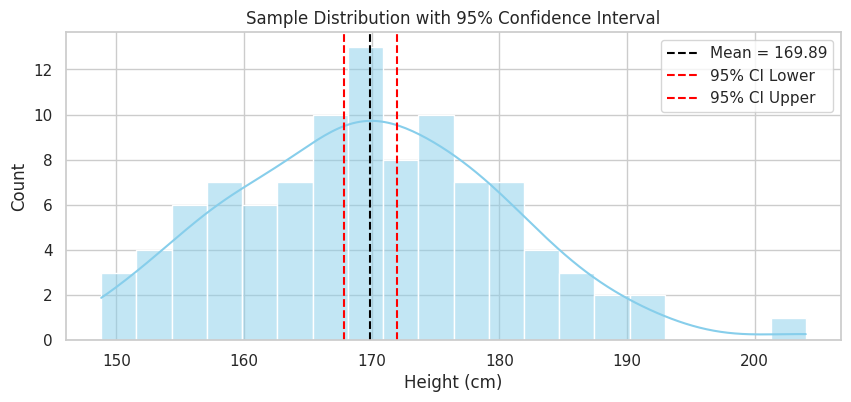

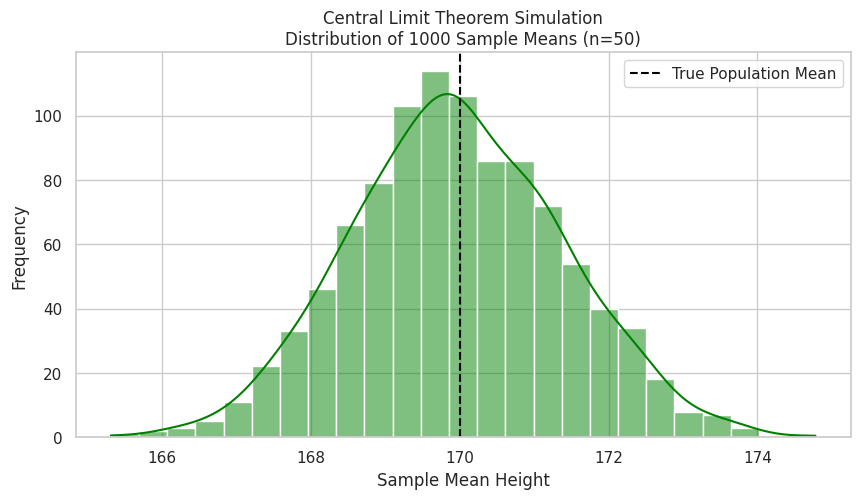

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Set style
sns.set(style="whitegrid")

# -----------------------------
# Simulated Population Heights
# -----------------------------
np.random.seed(42)
population = np.random.normal(loc=170, scale=10, size=100000)  # mean=170cm, sd=10cm

# -----------------------------
# Draw a Random Sample
# -----------------------------
sample_size = 100
sample = np.random.choice(population, size=sample_size, replace=False)

# -----------------------------
# Calculate Confidence Interval (95%)
# -----------------------------
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
confidence_level = 0.95
alpha = 1 - confidence_level
z_score = stats.norm.ppf(1 - alpha/2)

margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print("📊 Sample Mean Height:", round(sample_mean, 2))
print(f"✅ 95% Confidence Interval: [{round(ci_lower, 2)}, {round(ci_upper, 2)}]")

# -----------------------------
# Visualization: Sample & CI
# -----------------------------
plt.figure(figsize=(10, 4))
sns.histplot(sample, bins=20, kde=True, color='skyblue')
plt.axvline(sample_mean, color='black', linestyle='--', label=f"Mean = {sample_mean:.2f}")
plt.axvline(ci_lower, color='red', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper, color='red', linestyle='--', label='95% CI Upper')
plt.title("Sample Distribution with 95% Confidence Interval")
plt.legend()
plt.xlabel("Height (cm)")
plt.show()

# -----------------------------
# Central Limit Theorem Simulation
# -----------------------------
means = []
num_simulations = 1000
sample_size_clt = 50

for _ in range(num_simulations):
    sample = np.random.choice(population, size=sample_size_clt, replace=False)
    means.append(np.mean(sample))

# -----------------------------
# Visualization: CLT in Action
# -----------------------------
plt.figure(figsize=(10, 5))
sns.histplot(means, kde=True, color='green')
plt.axvline(np.mean(population), color='black', linestyle='--', label="True Population Mean")
plt.title(f"Central Limit Theorem Simulation\nDistribution of {num_simulations} Sample Means (n={sample_size_clt})")
plt.xlabel("Sample Mean Height")
plt.ylabel("Frequency")
plt.legend()
plt.show()
